In [1]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

# authenticate
credential = DefaultAzureCredential()

SUBSCRIPTION=<SUBSCRIPTION>
RESOURCE_GROUP=<RESOURCE_GROUP>
WS_NAME=<WS_NAME>
# Get a handle to the workspace
ml_client = MLClient(
    credential=credential,
    subscription_id=SUBSCRIPTION,
    resource_group_name=RESOURCE_GROUP,
    workspace_name=WS_NAME,
)

In [2]:
ws = ml_client.workspaces.get(WS_NAME)
print(ws.location,":", ws.resource_group)

southeastasia : ML_practice


# First Notebook in Azure ML Studio

In [3]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [4]:
data = load_iris()

In [5]:
X = data.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
data_df = load_iris(as_frame=True)
df = data_df.frame
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


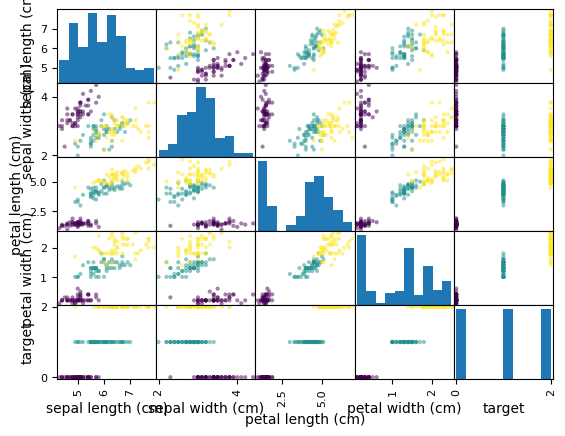

In [9]:
pd.plotting.scatter_matrix(df,c=df['target'])
plt.show()

In [6]:
y = data.target

In [7]:
cls = RandomForestClassifier()
cls.fit(X,y)
confusion_matrix(y,cls.predict(X))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
def ReLU(x):
    return x * (x > 0)

[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]


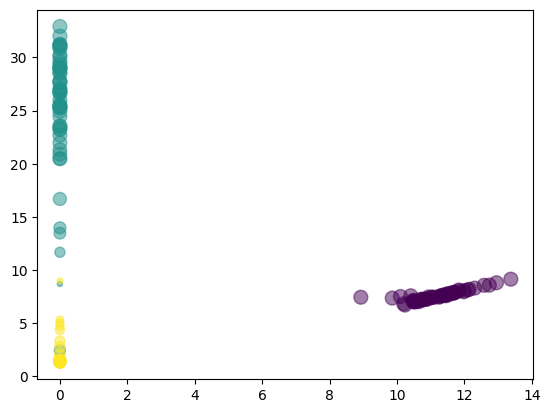

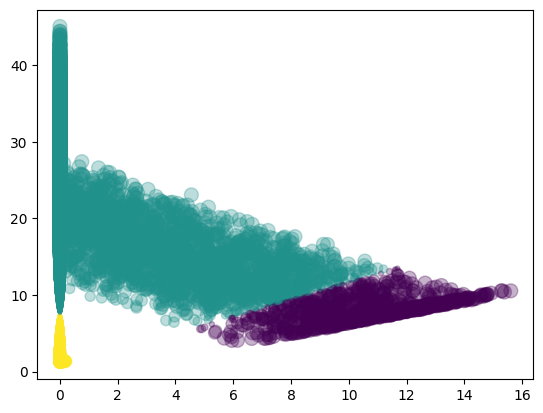

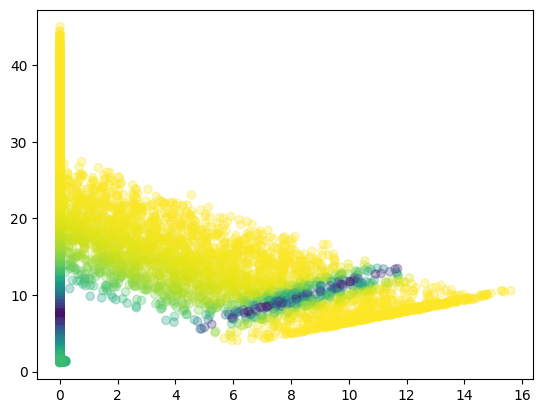

In [63]:
cls = MLPClassifier((16,8,4,2),max_iter=5000,n_iter_no_change=100,activation='relu')
cls.fit(X,y)
print(confusion_matrix(y,cls.predict(X)))
x2 = ReLU((np.matmul(X,cls.coefs_[0])+cls.intercepts_[0]))
x3 = ReLU((np.matmul(x2,cls.coefs_[1])+cls.intercepts_[1]))
x4 = ReLU((np.matmul(x3,cls.coefs_[2])+cls.intercepts_[2]))
x5 = ReLU((np.matmul(x4,cls.coefs_[3])+cls.intercepts_[3]))
# x5.shape
plt.scatter(x5[:,0],x5[:,1],c=y,alpha=0.5,s=((cls.predict_proba(X).max(axis=1)-cls.predict_proba(X).max(axis=1).min())/(cls.predict_proba(X).max(axis=1).max()-cls.predict_proba(X).max(axis=1).min()))*100)
plt.show()

X_rand = np.random.uniform(low=(X[:,0].min(),X[:,1].min(),X[:,2].min(),X[:,3].min()),
                           high=(X[:,0].max(),X[:,1].max(),X[:,2].max(),X[:,3].max()),
                           size=(10000,4))

x2 = ReLU((np.matmul(X_rand,cls.coefs_[0])+cls.intercepts_[0]))
x3 = ReLU((np.matmul(x2,cls.coefs_[1])+cls.intercepts_[1]))
x4 = ReLU((np.matmul(x3,cls.coefs_[2])+cls.intercepts_[2]))
x5 = ReLU((np.matmul(x4,cls.coefs_[3])+cls.intercepts_[3]))
# x5.shape
plt.scatter(x5[:,0],x5[:,1],c=cls.predict(X_rand),alpha=0.3,s=((cls.predict_proba(X_rand).max(axis=1)-cls.predict_proba(X_rand).max(axis=1).min())/(cls.predict_proba(X_rand).max(axis=1).max()-cls.predict_proba(X_rand).max(axis=1).min()))*100)
plt.show()
plt.scatter(x5[:,0],x5[:,1],alpha=0.3,c=((cls.predict_proba(X_rand).max(axis=1)-cls.predict_proba(X_rand).max(axis=1).min())/(cls.predict_proba(X_rand).max(axis=1).max()-cls.predict_proba(X_rand).max(axis=1).min())),vmin=0,vmax=1)
plt.show()